<a href="https://colab.research.google.com/github/LucasGleysson/Senac_ML/blob/master/ML_Projeto_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Projeto Final - Curso de Machine Learning SENAC
## Análise e predição de preço de imóveis

Dataset: https://www.kaggle.com/datasets/harlfoxem/housesalesprediction

Este conjunto de dados contém preços de venda de casas, incluindo casas vendidas entre maio de 2014 e maio de 2015.

- *(Mais informações sobre o dataset: https://geodacenter.github.io/data-and-lab//KingCounty-HouseSales2015/)*

##Objetivo

Analisar como os dados estão distribuidos e como eles se comportam em relação ao preço, no fim, tentar prever o preço das casas com base em algumas de suas características.

**Imports**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1- Visualização da base

In [2]:
houses = pd.read_csv('/content/drive/MyDrive/kc_house_data.csv')

In [3]:
houses

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [4]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

- Aparentemente, os dados não tem problemas com valores faltantes ou tipos errados nas colunas, então o foco maior pode ser voltado ao tratamento dos dados em si.

# 2- Análise Exploratória e Tratamento dos dados

- Primeiro, vou descartar algumas colunas.

In [5]:
houses = houses.drop(columns=['id','zipcode'])

- Id não vai ser muito útil e não precisamos do zipcode se já temos as coordenadas.

###Variáveis Categóricas

Vou separar algumas colunas de valor categórico e valores que deveriam ser pequeno para facilitar a análise inicial.

In [6]:
# Selecionando Colunas Categóricas
c_categoricas = houses.copy()
c_categoricas = c_categoricas[['waterfront','view','condition','grade']]
c_categoricas.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
waterfront,21613.0,0.007542,0.086517,0.0,0.0,0.0,0.0,1.0
view,21613.0,0.234303,0.766318,0.0,0.0,0.0,0.0,4.0
condition,21613.0,3.409430,0.650743,1.0,3.0,3.0,4.0,5.0
grade,21613.0,7.656873,1.175459,1.0,7.0,7.0,8.0,13.0


####Waterfront

In [7]:
c_categoricas['waterfront'].value_counts()

0    21450
1      163
Name: waterfront, dtype: int64

In [8]:
# Corrigindo pequeno erro em waterfront
houses.loc[houses['waterfront'] == 3] = 1
houses.loc[houses['waterfront'] == 3]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15


- Os dado categóricos parecem não ter muito problemas, exceto o view.

####View

In [9]:
# Checando porcentagem
(c_categoricas['view'].value_counts() / c_categoricas.shape[0]) * 100

0    90.172581
2     4.455652
3     2.359691
1     1.536113
4     1.475964
Name: view, dtype: float64

- View(vista do imóvel) tem 90% dos seus registros com valor 0,mesmo que as notas de condição e estrutura da casa variem.

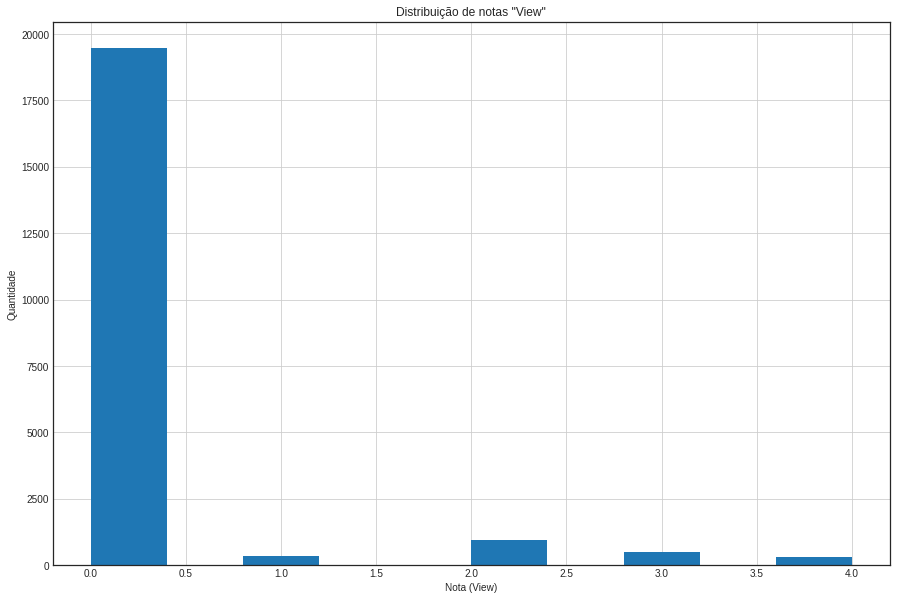

In [10]:
# Visualizando distribuição no gráfico
plt.style.use('seaborn-white')
plt.figure(figsize=(15,10))
plt.hist(c_categoricas['view'])
plt.title('Distribuição de notas "View"')
plt.xlabel('Nota (View)')
plt.ylabel('Quantidade')
plt.grid(True)
plt.show()

- View indica a vista da propriedade basicamente, isso pode indicar que boa parte do terreno pode precisar ser arrumado.

- O crusamento dos dados de view e condition ajudam a ter uma ideia de como pode esta a situação da maioria das casas. 

In [11]:
# Cruzando dados.
pd.crosstab(index=c_categoricas['view'], columns = c_categoricas['condition'])

condition,1,2,3,4,5
view,,,,,
0,27,166,12768,5054,1474
1,1,1,191,105,34
2,0,3,588,268,104
3,0,2,309,153,46
4,2,0,175,99,43


- Mesmo a propriedade não tendo uma boa nota de visualização, a maioria das casas se mantem em condições relativamente boas, com notas iguais e maiores que 3.

####Grade e Condition

- Uma observação interessante de se fazer, é sobre os preços dos imóveis em relação a sua classificação e condição.

-	"Grade - Classificação por qualidade de construção que se refere aos tipos de materiais utilizados e à qualidade da mão-de-obra. Edifícios de melhor qualidade (grau mais alto) custam mais para serem construídos por unidade de medida e exigem maior valor." 

referência: (https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r#b)

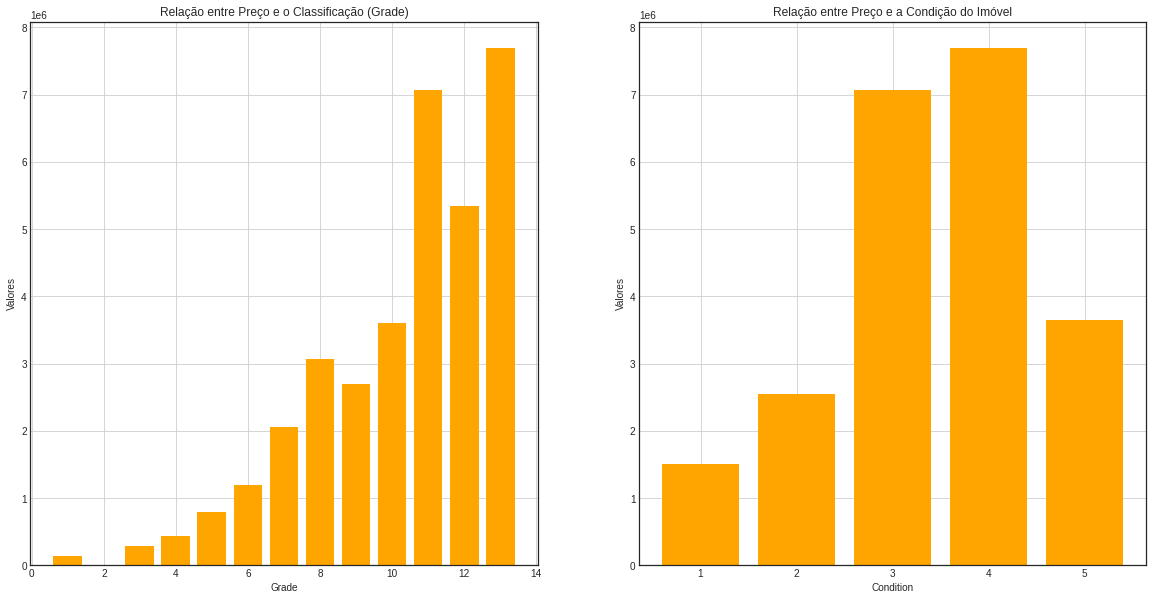

In [12]:
plt.style.use('seaborn-white')
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.bar(c_categoricas['grade'], houses['price'], color='orange')
plt.title('Relação entre Preço e o Classificação (Grade)')
plt.xlabel('Grade')
plt.ylabel('Valores')
plt.grid(True)

plt.subplot(1,2,2)
plt.bar(c_categoricas['condition'], houses['price'], color='orange')
plt.title('Relação entre Preço e a Condição do Imóvel')
plt.xlabel('Condition')
plt.ylabel('Valores')
plt.grid(True)

plt.show()

- E também a forma com que as duas estão relacionadas

In [13]:
# Cruzando dados.
pd.crosstab(index=c_categoricas['grade'], columns = c_categoricas['condition'])

condition,1,2,3,4,5
grade,,,,,
1,1,0,0,0,0
3,0,1,1,0,1
4,1,5,13,10,0
5,9,15,100,84,34
6,11,59,1035,685,248
7,6,75,5234,2833,833
8,2,13,4269,1394,390
9,0,2,2041,446,126
10,0,2,921,156,55


- A maioria dos valores tem grade entre 6 e 9 e condições maiores ou iguais a 3.

###Numéricas

Agora é a vez de analisar algumas variáveis numéricas, principalmente que possam estar relacionadas com os preços.

In [14]:
# Selecionando Colunas
c_numericas = houses.copy()
c_numericas = c_numericas[['bathrooms','bedrooms','sqft_living','sqft_lot','yr_built','yr_renovated','sqft_living15','sqft_lot15']]
c_numericas

,bathrooms,bedrooms,sqft_living,sqft_lot,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,1.00,3,1180,5650,1955,0,1340,5650
1,2.25,3,2570,7242,1951,1991,1690,7639
2,1.00,2,770,10000,1933,0,2720,8062
3,3.00,4,1960,5000,1965,0,1360,5000
4,2.00,3,1680,8080,1987,0,1800,7503
...,...,...,...,...,...,...,...,...
21608,2.50,3,1530,1131,2009,0,1530,1509
21609,2.50,4,2310,5813,2014,0,1830,7200
21610,0.75,2,1020,1350,2009,0,1020,2007
21611,2.50,3,1600,2388,2004,0,1410,1287


In [15]:
c_numericas.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
bathrooms,21613.0,2.114757,0.770163,0.0,1.75,2.25,2.5,8.0
bedrooms,21613.0,3.370842,0.930062,0.0,3.00,3.00,4.0,33.0
sqft_living,21613.0,2079.899736,918.440897,290.0,1427.00,1910.00,2550.0,13540.0
sqft_lot,21613.0,15106.967566,41420.511515,520.0,5040.00,7618.00,10688.0,1651359.0
yr_built,21613.0,1971.005136,29.373411,1900.0,1951.00,1975.00,1997.0,2015.0
yr_renovated,21613.0,84.402258,401.679240,0.0,0.00,0.00,0.0,2015.0
sqft_living15,21613.0,1986.552492,685.391304,399.0,1490.00,1840.00,2360.0,6210.0
sqft_lot15,21613.0,12768.455652,27304.179631,651.0,5100.00,7620.00,10083.0,871200.0


- Bedrooms pode ter um outlier
- Os valores medianos em sqft_lot e sqft_lot15 estão muitos distantes dos valores da média, além do alto valor do desvio padrão, isso indica a presença de valores muito altos nessas duas colunas.

####Price
- Mas, antes de observar o comportamento dessas variáveis, vamos observar como os preços estãos distribuidos.

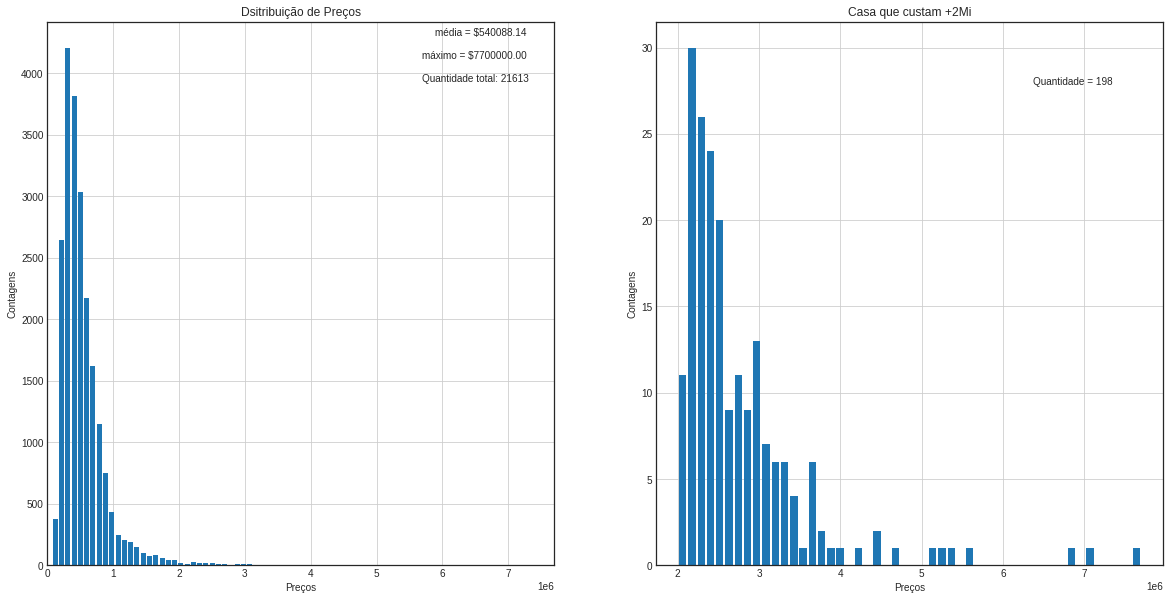

In [16]:
plt.figure(figsize=(20,10))
plt.style.use('seaborn-white')

#################################################################################
# Primeiro Gráfico
plt.subplot(1,2,1)

# Definindo uma pequena legenda primeiro gráfico
text = f'média = ${houses["price"].mean():.2f} \n\nmáximo = ${max(houses["price"]):.2f} \n\nQuantidade total: {houses.shape[0]}'
ax = plt.gca()
plt.text(0.95, 0.99,  text, horizontalalignment='right', verticalalignment='top', transform=ax.transAxes)

plt.hist(houses['price'], rwidth=0.8, bins=80)
plt.xlim(-100, max(houses['price'])+5)
plt.title('Dsitribuição de Preços')
plt.xlabel('Preços')
plt.ylabel('Contagens')
plt.grid(True)
#################################################################################
#################################################################################
# Separando valores muito altos.
price_high = houses.loc[houses['price']>2000000]

# Segundo Gráfico
plt.subplot(1,2,2)

# Pequena legenda segundo gráfico
text = f'Quantidade = {price_high["price"].shape[0]}'
ax = plt.gca()
plt.text(0.90, 0.90,  text, horizontalalignment='right', verticalalignment='top', transform=ax.transAxes)

plt.hist(price_high['price'], rwidth=0.8, bins=50)
plt.title('Casa que custam +2Mi')
plt.xlabel('Preços')
plt.ylabel('Contagens')
plt.grid(True)
#################################################################################

- Podemos ver que os preços estão muito mal distribuidos e a causa é a existencia de uma quantidade relativamente pequena de valores muito altos.

####Bedrooms

In [17]:
# Lidando com bedrooms demais
houses.loc[houses['bedrooms'] == 33] = 3
houses.loc[houses['bedrooms'] == 33]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15


####Sqft_Lot e Sqft_Living

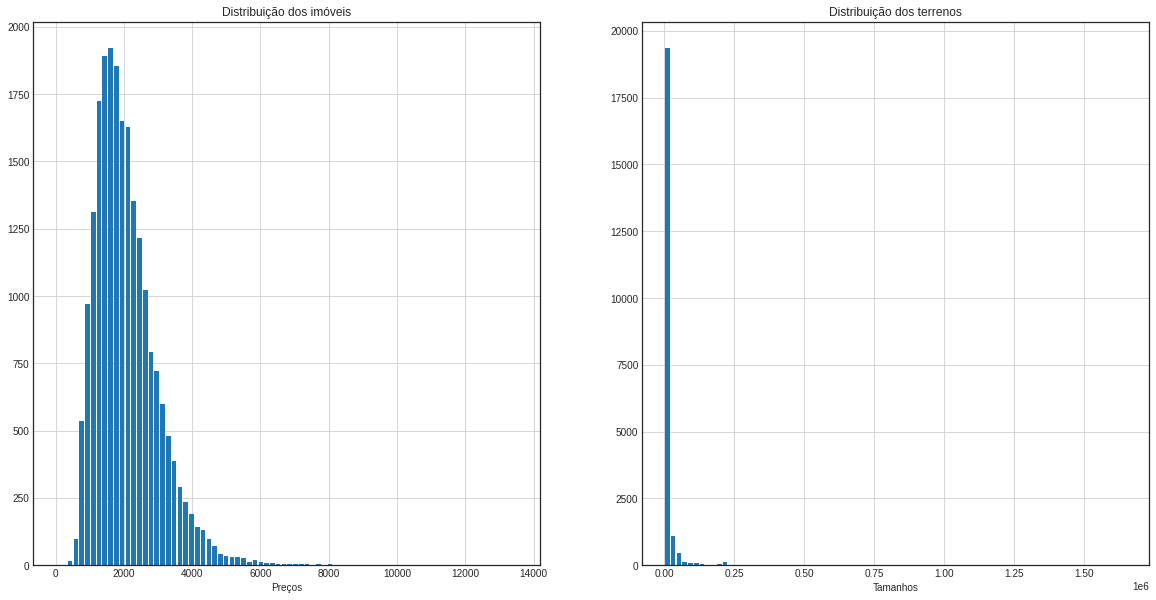

In [18]:
plt.style.use('seaborn-white')
plt.figure(figsize=(20,10))

# Relação do tamanho do terreno com o preço do imóvel
plt.subplot(1,2,1)
plt.hist(houses['sqft_living'], rwidth=0.8, bins=80)
plt.title('Distribuição dos imóveis')
plt.xlabel('Preços')
plt.grid(True)

# Relação do tamanho do imóvel com o preço

plt.subplot(1,2,2)
plt.hist(houses['sqft_lot'], rwidth=0.8, bins=80)
plt.title('Distribuição dos terrenos')
plt.xlabel('Tamanhos')
plt.grid(True)

plt.show()



- Além do terreno ter uma distribuição de dados não muito boa, ela tem uma relação estranha com o preço, em comparação com a relação que o tamanho do imóvel tem.

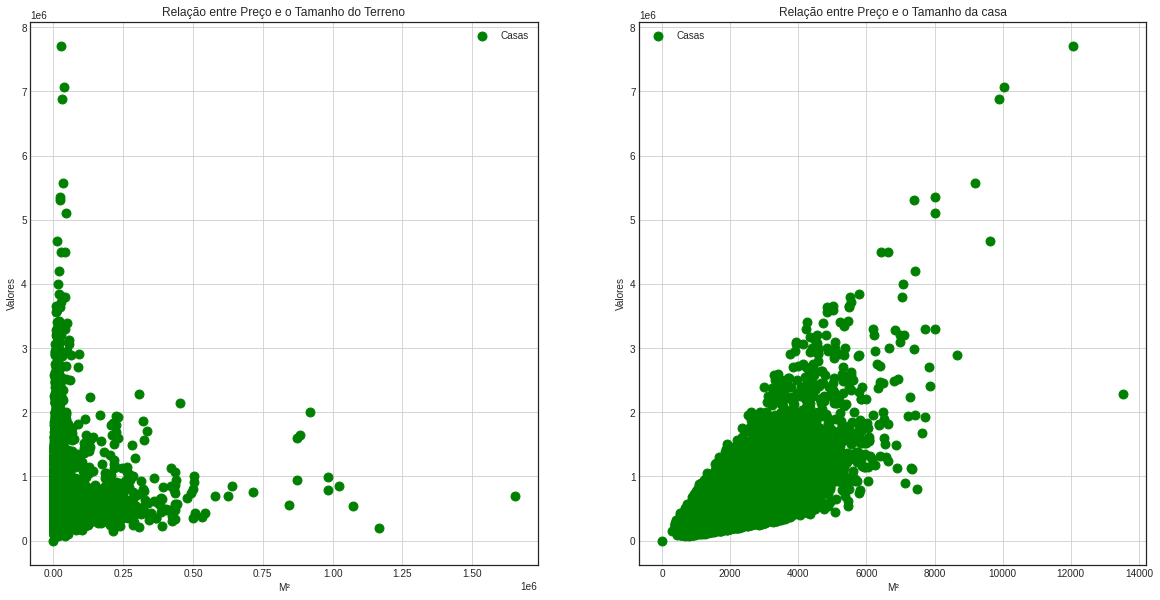

In [19]:
plt.style.use('seaborn-white')
plt.figure(figsize=(20,10))

# Relação do tamanho do terreno com o preço do imóvel
plt.subplot(1,2,1)
plt.scatter(houses['sqft_lot'],houses['price'], s=80, color='green')
plt.title('Relação entre Preço e o Tamanho do Terreno')
plt.xlabel('M²')
plt.ylabel('Valores')
plt.legend(['Casas'], loc='upper right')
plt.grid(True)

# Relação do tamanho do imóvel com o preço
plt.subplot(1,2,2)
plt.scatter(houses['sqft_living'],houses['price'], s=80, color='green')
plt.title('Relação entre Preço e o Tamanho da casa')
plt.xlabel('M²')
plt.ylabel('Valores')
plt.legend(['Casas'], loc='upper left')
plt.grid(True)

plt.show()

- Enquanto o preço aumenta conforme o tamanho da casa aumenta, quando se trata do terreno, observamos que existem casa com terrenos pequenos mas que custam muito, e casa com terrenos enormes mas que são baratas.

- Apesar dos altos valores altos, é dificil definir o que seria um valor errado ou não quando se trata de terreno, principalmente por não ser um ou cinco registros especiais, o que faz crer que esses dados também estão representando uma realidade.

####Yr_Built e Yr_Renovated

In [20]:
# Tratando um valor errado em yr_built
houses.loc[houses['yr_built'] < 1800]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
15870,3,3.0,3,3.0,3,3,3.0,3,3,3,3,3,3,3,3,3.0,3.0,3,3


In [21]:
houses = houses.drop(houses.loc[houses['yr_built'] < 1800].index)
houses.loc[houses['yr_built'] < 1800]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15


- Aqui, podemos observar um pouco sobre quando os imóveis foram construídos e quando foram renovádos.

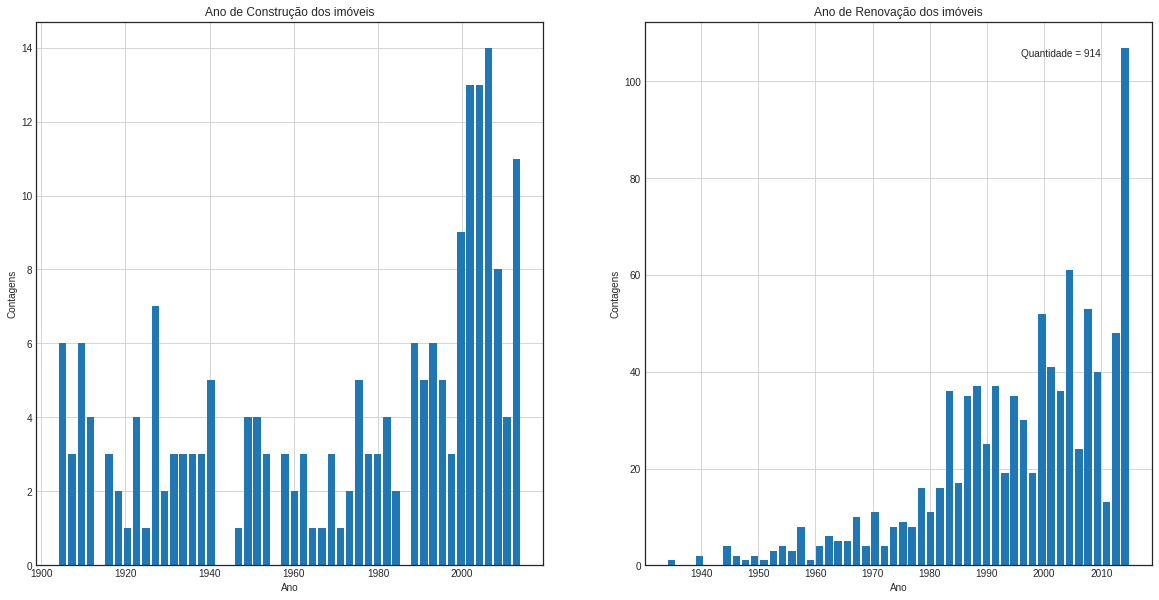

In [22]:
plt.style.use('seaborn-white')
plt.figure(figsize=(20,10))

# Relação do tamanho do terreno com o preço do imóvel
plt.subplot(1,2,1)
plt.hist(price_high['yr_built'], rwidth=0.8, bins=50)
plt.title('Ano de Construção dos imóveis')
plt.xlabel('Ano')
plt.ylabel('Contagens')
plt.grid(True)

# Relação do tamanho do imóvel com o preço
renovated = houses.loc[houses['yr_renovated'] != 0]

plt.subplot(1,2,2)
text = f'Quantidade = {renovated.shape[0]}'
ax = plt.gca()
plt.text(0.90, 0.95,  text, horizontalalignment='right', verticalalignment='top', transform=ax.transAxes)

plt.hist(renovated['yr_renovated'], rwidth=0.8, bins=50)
plt.title('Ano de Renovação dos imóveis')
plt.xlabel('Ano')
plt.ylabel('Contagens')
plt.grid(True)

plt.show()

- Mesmo pequeno, se pode ter noção sobre o espaçamento entre as epocas em que as casas foram construidas.

- Uma quantidade bem pequena de casas foram renovadas, mas o gráfico ajuda a observar a epoca em que as renovação mais aconteceram.

- Por fim, podemos observar se existe alguma relação entre o ano de contrução ou renovação da casa e o preço.

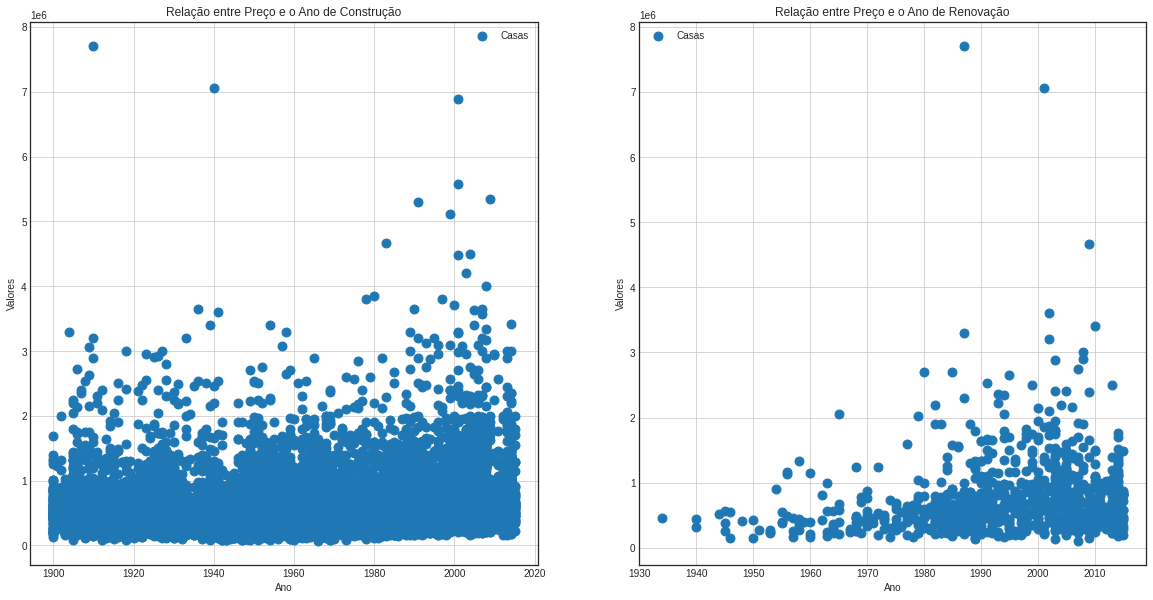

In [23]:
plt.style.use('seaborn-white')
plt.figure(figsize=(20,10))

# Relação entre Preço e o Ano de Construção
plt.subplot(1,2,1)
plt.scatter(houses['yr_built'],houses['price'], s=80)
plt.title('Relação entre Preço e o Ano de Construção')
plt.xlabel('Ano')
plt.ylabel('Valores')
plt.legend(['Casas'], loc='upper right')
plt.grid(True)

# Relação entre Preço e o Ano de Renovação
plt.subplot(1,2,2)
plt.scatter(renovated['yr_renovated'],renovated['price'], s=80)
plt.title('Relação entre Preço e o Ano de Renovação')
plt.xlabel('Ano')
plt.ylabel('Valores')
plt.legend(['Casas'], loc='upper left')
plt.grid(True)

plt.show()

- Não existe uma tentedência exatamente entre quando a casa foi construída ou renovada com relação ao preço.

##Trantando Date.
- Essa formatação é so para facilitar o maniseio com as datas os valores das datas.

In [24]:
houses['date'] = pd.to_datetime(houses['date'])
houses['year'] = houses['date'].dt.year
houses['month'] = houses['date'].dt.month
houses['day'] = houses['date'].dt.day

houses = houses.drop('date', axis=1)

- Desta forma, por exemplo, é possível analisar a em que mês do ano estão foram vendos os imóveis com maiores valores.

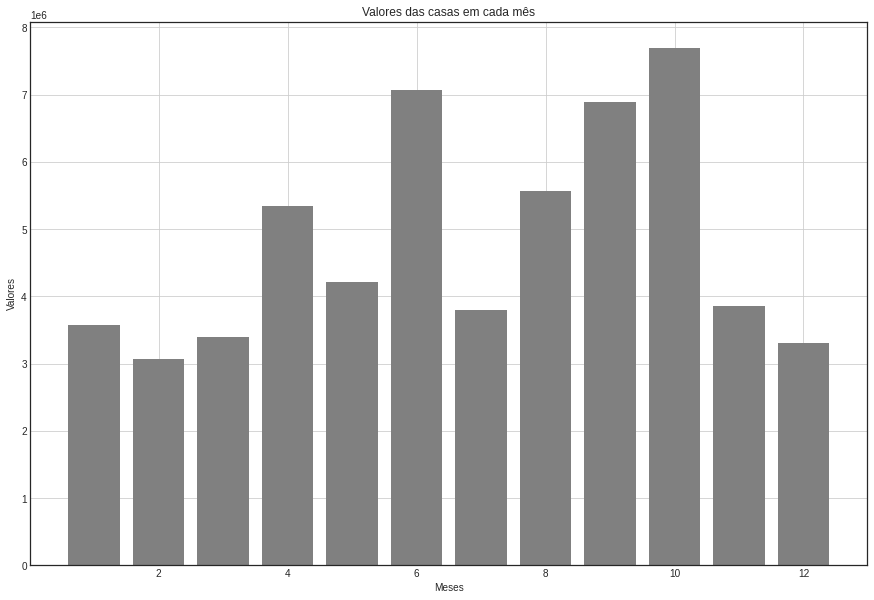

In [25]:
plt.style.use('seaborn-white')
plt.figure(figsize=(15,10))
plt.bar(houses['month'],houses['price'], color='gray')
plt.title('Valores das casas em cada mês')
plt.xlabel('Meses')
plt.ylabel('Valores')

plt.grid(True)

## Conclusões

Os dados não estão muito bem  distribuidos mas em sua maioria, os valores altos demais não são necessáriamente erros, afinal existem imóveis com terrenos enormes, e por não serem valores tão claramente estranhos e fora do padrão, fica difícil decidir o que fica e o que sai.

 Acabei optando por fazer duas coisas, duas regressões diferentes, onde uma será feita com os dados do jeito que estão e a outra será feita com os dados tratados, onde não existirão os valores tão exorbitantes.

# 3- Machine Learning

##Sem tratamento

- Primeiro, importamos as bibliotecas que vamos usar.

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

- Então fazemos todas as preparações.

In [27]:
# Definimos a variável alvo e a isolamos.
target = houses['price']
datas = houses.drop(columns='price')

# Definimos as variáveis de treino e teste
x_train, x_test, y_train, y_test = train_test_split(datas, target, random_state=42, shuffle=True)

# Criamos o modelo e fazemos o treinamento
model_LR = LinearRegression()
model_LR.fit(x_train, y_train)

# Visualizamos os coeficientes gerados.
for column, coef in zip(datas.columns, model_LR.coef_):
  print(f'{column}: {coef}')

bedrooms: -37835.710823579546
bathrooms: 47334.13290916514
sqft_living: 109.40907305135438
sqft_lot: 0.08222178597066564
floors: -49.230603357966224
waterfront: 559507.0185784957
view: 49955.81616153939
condition: 28995.308558656016
grade: 95546.59903645792
sqft_above: 72.17622157713132
sqft_basement: 37.23285106195769
yr_built: -2517.8162067048024
yr_renovated: 24.467199340723187
lat: 556073.3492858607
long: -106008.69008987442
sqft_living15: 24.79474770288268
sqft_lot15: -0.3271903281958543
year: 36641.60683109271
month: 1354.4055776401724
day: -296.5625495857995


- Encontramos e checamos os coeficientes gerados.

- "Os coeficientes de regressão representam a mudança média na variável resposta para uma unidade de mudança na variável preditora, mantendo as outras preditoras na constante do modelo. Esse controle estatístico que a regressão proporciona é importante porque isola o papel de uma variável de todas as outras no modelo."

- Depois de treinado, partimos para as predições.

In [28]:
# Treino de predição
y_pred_train = model_LR.predict(x_train)

# Predição
y_pred = model_LR.predict(x_test)

###Metricas

In [29]:
print('MAE:', mean_absolute_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))

MAE: 126221.24016345064
RMSE: 209945.44653846594
R2 Score: 0.6997647647974699


Vamos plotar alguns dados para fazer um teste de predição do valor da casa.
- bedrooms: 3
- bathrooms: 2
- sqft_living:1800
- sqft_lot: 4500
- floors : 2
- waterfront :0
- view: 0
- condition :4
- grade: 8
- sqft_above : 750
- sqft_basement: 900
- yr_built : 1995
- yr_renovated : 0
- lat: 47
- long: -122
- sqft_living15 : 1700
- sqft_lot15 : 6000
- year : 2015
- month : 12
- day : 3

In [30]:
# Teste de Predição
model_LR.predict([[3,2,1800,4500,2,0,0,4,8,750,900,1995,0,47,-122,1700,6000,2015,12,3]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([132512.80849221])

## Com o tratamento

Correções: 
- Valores altos de preços
- Valores altos de lots

In [31]:
houses.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,21612.0,540083.518786,367135.061269,75000.0000,321837.500000,450000.0000,645000.000,7.700000e+06
bedrooms,21612.0,3.369471,0.907982,0.0000,3.000000,3.0000,4.000,1.100000e+01
bathrooms,21612.0,2.114774,0.770177,0.0000,1.750000,2.2500,2.500,8.000000e+00
sqft_living,21612.0,2079.921016,918.456818,290.0000,1426.500000,1910.0000,2550.000,1.354000e+04
sqft_lot,21612.0,15107.388951,41421.423497,520.0000,5040.000000,7619.0000,10688.250,1.651359e+06
floors,21612.0,1.494332,0.539991,1.0000,1.000000,1.5000,2.000,3.500000e+00
waterfront,21612.0,0.007542,0.086519,0.0000,0.000000,0.0000,0.000,1.000000e+00
view,21612.0,0.234314,0.766334,0.0000,0.000000,0.0000,0.000,4.000000e+00
condition,21612.0,3.409356,0.650668,1.0000,3.000000,3.0000,4.000,5.000000e+00
grade,21612.0,7.656904,1.175477,1.0000,7.000000,7.0000,8.000,1.300000e+01


In [32]:
# Tratando preços altos
std_price = houses['price'].std() * 3
houses = houses.loc[houses['price'] < std_price]

# Tratando tamanhos de terrenos muito grandes
houses = houses.loc[houses['sqft_lot'] < 18000]
houses = houses.loc[houses['sqft_lot15'] < 19000]
houses = houses.loc[houses['sqft_living'] < 5000]
houses = houses.loc[houses['sqft_living15'] < 6000]

# Tratando de valores de imóveis maiores que o terreno
houses = houses.drop(index=houses.loc[houses['sqft_lot'] < houses['sqft_living']].index.tolist())

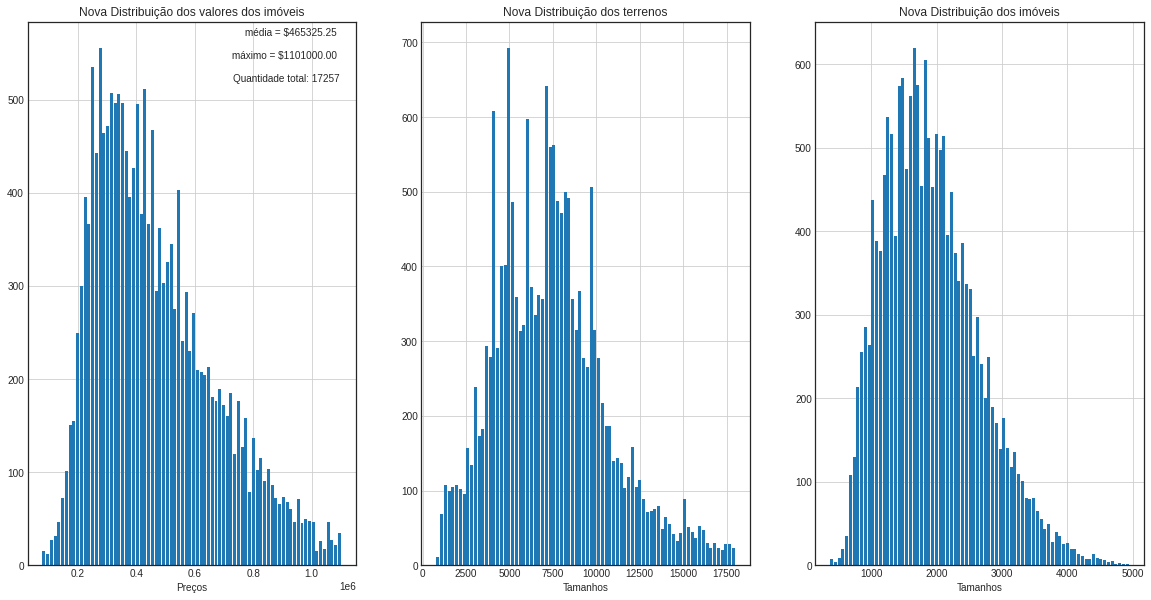

In [33]:
plt.style.use('seaborn-white')
plt.figure(figsize=(20,10))


plt.subplot(1,3,1)
text = f'média = ${houses["price"].mean():.2f} \n\nmáximo = ${max(houses["price"]):.2f} \n\nQuantidade total: {houses.shape[0]}'
ax = plt.gca()
plt.text(0.95, 0.99,  text, horizontalalignment='right', verticalalignment='top', transform=ax.transAxes)
plt.hist(houses['price'], rwidth=0.8, bins=80)
plt.title('Nova Distribuição dos valores dos imóveis')
plt.xlabel('Preços')
plt.grid(True)

plt.subplot(1,3,2)
plt.hist(houses['sqft_lot'], rwidth=0.8, bins=80)
plt.title('Nova Distribuição dos terrenos')
plt.xlabel('Tamanhos')
plt.grid(True)

plt.subplot(1,3,3)
plt.hist(houses['sqft_living'], rwidth=0.8, bins=80)
plt.title('Nova Distribuição dos imóveis')
plt.xlabel('Tamanhos')
plt.grid(True)

plt.show()

In [34]:
# Definimos a variável alvo e a isolamos.
target = houses['price']
datas = houses.drop(columns='price')

# Definimos as variáveis de treino e teste
x_train, x_test, y_train, y_test = train_test_split(datas, target, random_state=42, shuffle=True)

# Criamos o modelo e fazemos o treinamento
model_LR = LinearRegression()
model_LR.fit(x_train, y_train)

# Visualizamos os coeficientes gerados.
for column, coef in zip(datas.columns, model_LR.coef_):
  print(f'{column}: {coef}')

bedrooms: -8278.776909385564
bathrooms: 20724.73550927481
sqft_living: 53.80465841510784
sqft_lot: -1.7346990604262933
floors: 8632.437371095897
waterfront: 196783.04810568516
view: 30170.55008875727
condition: 31721.363703642623
grade: 76476.31449905758
sqft_above: 32.5520265485565
sqft_basement: 21.25263176980243
yr_built: -1829.3955588773515
yr_renovated: 16.608471492316646
lat: 527760.4033725136
long: 29772.450042241802
sqft_living15: 55.07490186306116
sqft_lot15: -5.821221553571472
year: 22661.479029502156
month: 245.4291711260565
day: -66.5502261728644


In [35]:
# Treino de predição
y_pred_train = model_LR.predict(x_train)

# Predição
y_pred = model_LR.predict(x_test)

###Metricas

In [36]:
print('MAE:', mean_absolute_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))

MAE: 85528.24015587065
RMSE: 114022.02610098655
R2 Score: 0.6934846598566777


In [37]:
# Teste de Predição
model_LR.predict([[3,2,1800,4500,2,0,0,4,8,750,900,1995,0,47,-122,1700,6000,2015,12,3]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([188617.77712566])

##Conclusão
- Com o tratamento as metricas melhoraram considerávelmente.